# variational Autoencoder (VAE)

- variational Autoencoder gets name from its ability to perform variational inference


- VAE is a **generative model**, can generate new data points distributed like original data points

## can Autoencoder be a generative model?

- can we use an Autoencoder as a generative model?

    yes, use **decoder** part of an Autoencoder
    

- architecture of Autoencoder

    - training process: input (a high dim vector) > encoder > encoded vector (in latent space) > decoder > reconstructed input (output without noise or with some augmentation)
    
    - **generation process**: **sampler** (throw away encoder, sample from latent space) > sampled vector (from latent space, similar to encoded vector) > decoder > generated content

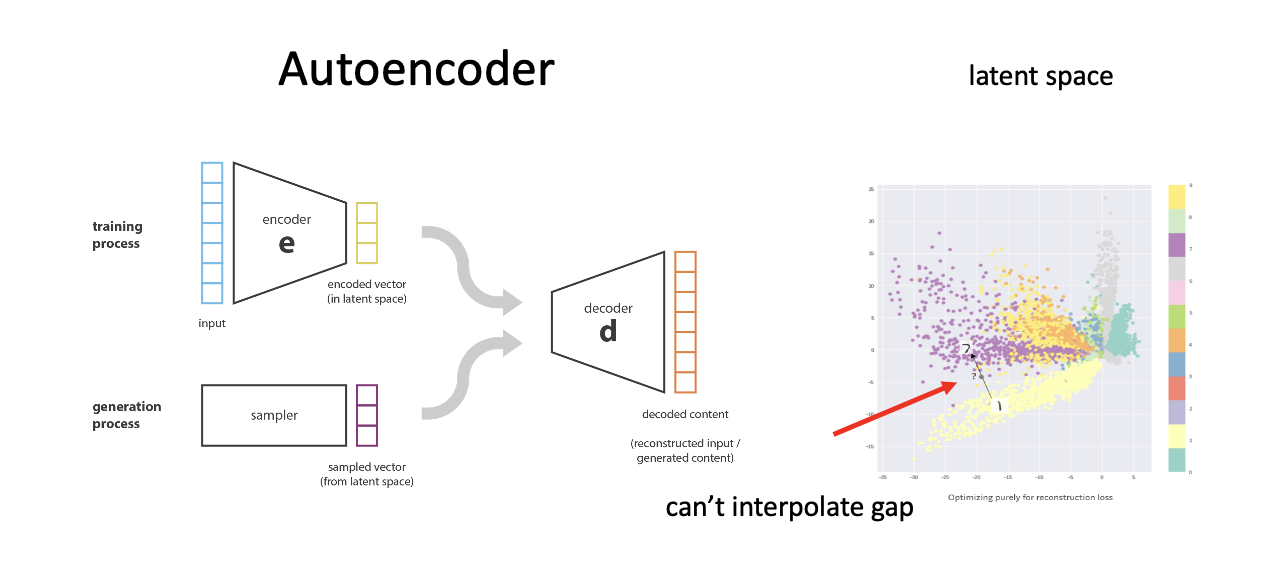

- problem

    latent space of Autoencoder is only optimized for reconstruction rather than generation,

    it can only reconstruct samples in training data

    there is gap between any data point in the latent space, can't interpolate data point in gap.

## loss function of VAE

- loss = reconstruction loss (push clusters far away) + KL divergence (push clusters close)

$$
L = \left\| x - \hat x \right\|_2^2 + KL[N(\mu_x, \sigma_x), N(0,1)] 
$$

- VAE gives each data point in the latent space an overlapped **buffer zone** $z \sim N(\mu_x, \sigma_x)$ to fill the gap region between single data points

    by add a regularization term of KL divergence to reconstruction error: penalize Gaussian distributions in the latent space from being too far from standard normal distribution N(0,1)



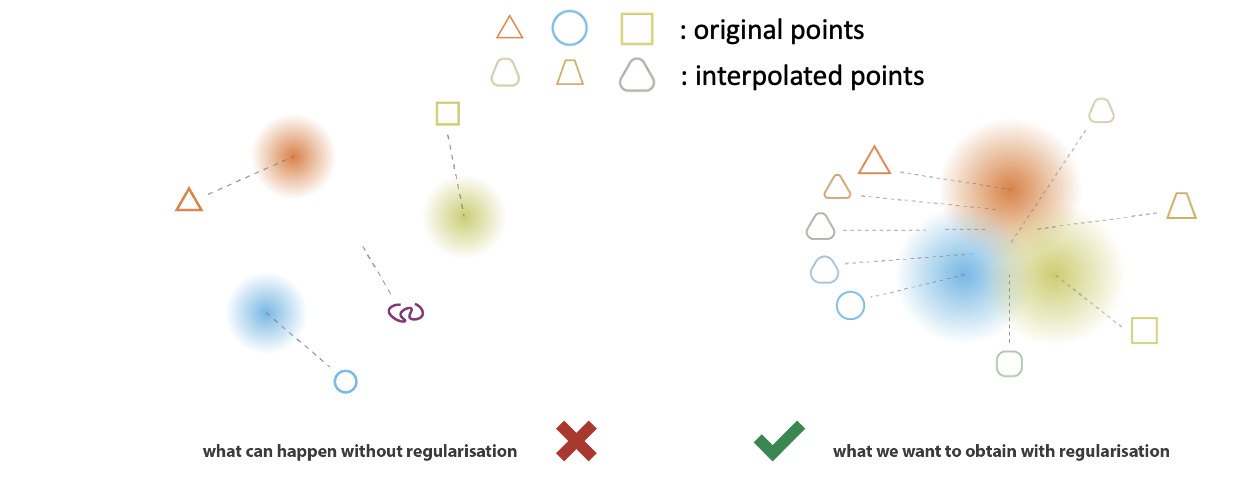

## reparameterization trick

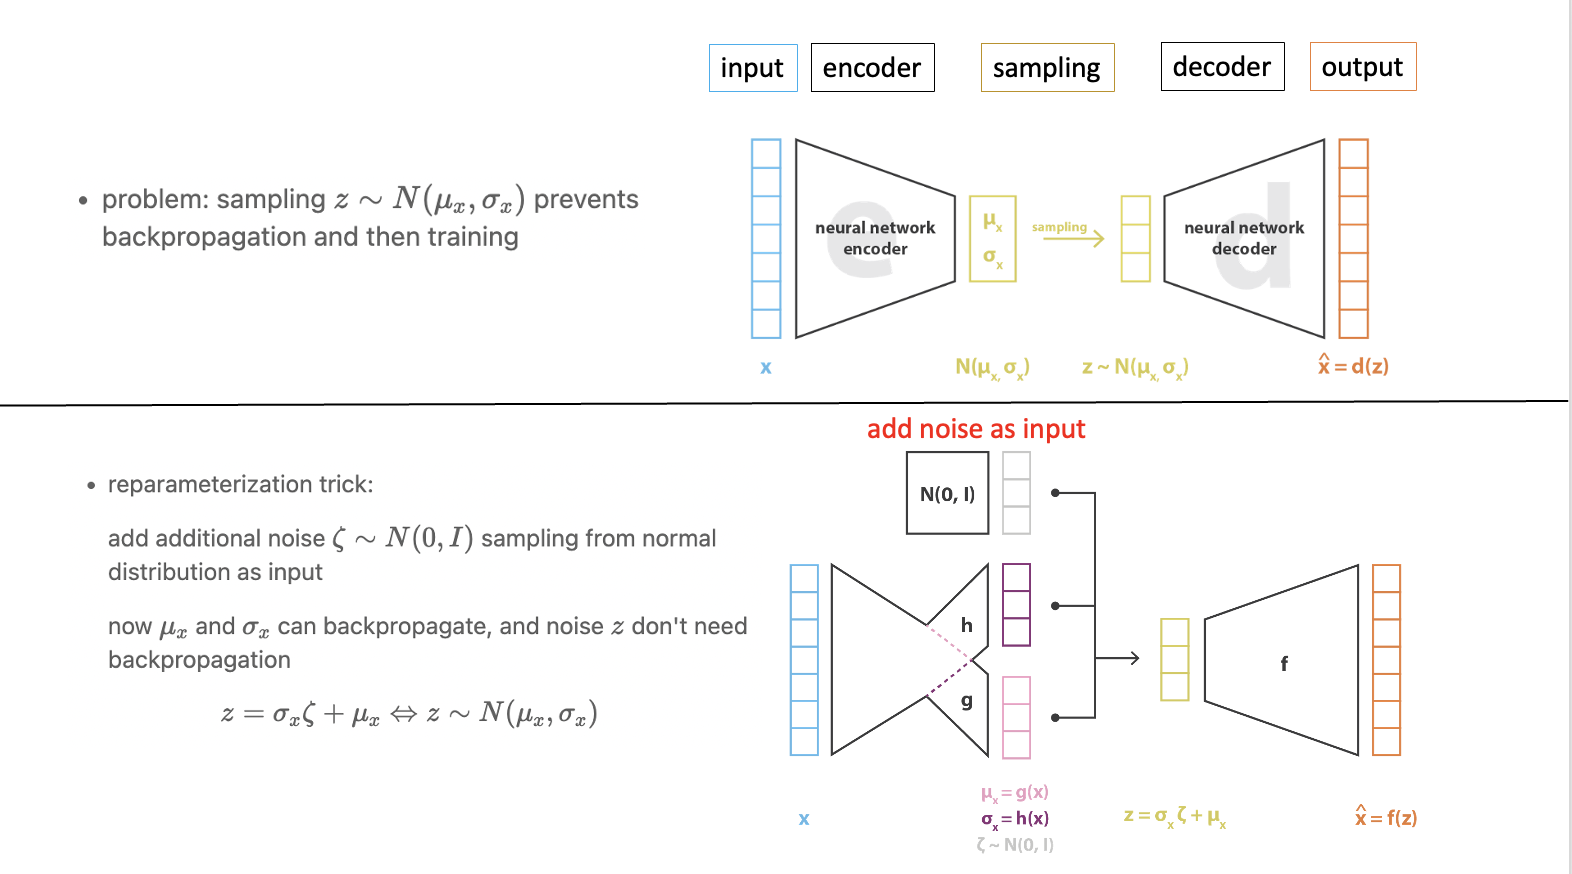

- problem: sampling $z \sim N(\mu_x, \sigma_x)$ prevents backpropagation and then training


- reparameterization trick: 

    split encoder into 2 parts, one part $h$ encodes mean, another part $g$ encodes standard deviation

    add additional noise $\zeta \sim N(0, I)$ sampling from normal distribution as input 
    
    now $\mu_x$ and $\sigma_x$ can backpropagate, and noise $z$ don't need backpropagation


$$
z = \sigma_x \zeta + \mu_x \Leftrightarrow z \sim N(\mu_x, \sigma_x)
$$



- new loss function
$$
C\left\| x - \hat x \right\|_2^2 + KL[N(\mu_x, \sigma_x), N(0,1)] 
$$

$$
= C\left\| x - f(z) \right\|_2^2 + KL[N(g(x), h(x)), N(0,1)] 
$$